<a href="https://colab.research.google.com/github/ithadisushmitha/FML/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import numpy as np


In [25]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [26]:
kmeans.labels_


array([1, 1, 1, 0, 0, 0], dtype=int32)

In [27]:
kmeans.predict([[0, 0], [12, 3]])


array([1, 0], dtype=int32)

In [28]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [29]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



In [30]:
df = pd.read_csv("/content/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.shape

(150, 6)


Apply Feature Scaling

Clustering algorithms like K-means require feature scaling of the data as part of data preprocessing to produce good results. This is because clustering techniques use distance calculation between the data points. Hence it is proper to bring data of different units under a common scale.



In [32]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['SepalWidthCm','PetalLengthCm']])
df_scale = pd.DataFrame(scale, columns = ['SepalWidthCm','PetalLengthCm']);
df_scale.head(5)


,SepalWidthCm,PetalLengthCm
0,0.625000,0.067797
1,0.416667,0.067797
2,0.500000,0.050847
3,0.458333,0.084746
4,0.666667,0.067797


apply K-Means in Sklearn to group the dataset into 2 clusters (0 and 1). The output shows the cluster (0th or 1st) corresponding to the data points in the dataset.


In [33]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scale[['SepalWidthCm','PetalLengthCm']])
y_predicted


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [34]:
km.cluster_centers_


array([[0.36333333, 0.6620339 ],
       [0.59083333, 0.07864407]])

Finally, let us visualize the results. From the graph, it is evident that there is a scope for data to be grouped into more clusters than only 2.

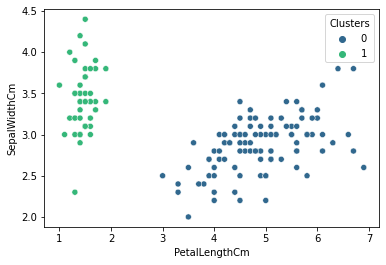

In [35]:
df['Clusters'] = km.labels_
sns.scatterplot(x="PetalLengthCm", y="SepalWidthCm",hue = 'Clusters',  data=df,palette='viridis')


In [36]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

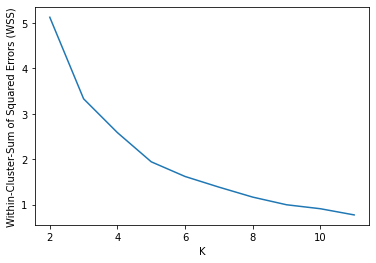

In [37]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [38]:
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_scale[['SepalWidthCm','PetalLengthCm']])
y_predicted

array([1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 4, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3,
       2, 2, 3, 0, 2, 3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 0, 2, 3, 2], dtype=int32)

In [47]:
km.cluster_centers_


array([[0.60087719, 0.08117752],
       [0.39534884, 0.61884115],
       [0.35294118, 0.83449651],
       [0.1875    , 0.52118644],
       [0.43287037, 0.06873823],
       [0.55208333, 0.80614407],
       [0.79487179, 0.08865711]])

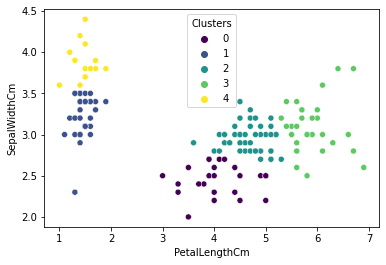

In [40]:
df['Clusters'] = km.labels_

sns.scatterplot(x="PetalLengthCm", y="SepalWidthCm",hue = 'Clusters',  data=df,palette='viridis')